# **Brandon Luy**

> **Team** **Members**:  Brandon Luy


> **ID**:11532759



> Taking a spin on NBA Statisics using machine learning, instead of trying to predict the outcome of a game using statistics, predict the players that are most similar based on their indiviudal game stats, such as points, rebounds, assists, 3 pointers per game, minutes and wheere shots were takin on the court. This specifically analyzes the technicals of the NBA Players game not how their game looks visually compared to other players such as Kobe Bryant and Michael Jordan. 




In [53]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from basketball_reference_scraper.players import get_stats
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [37]:
#load the data 
#uploaded csv into colab 
nba = pd.read_csv('/content/NBA2021-2022PlayerStats.csv')
#show first 50 players
nba.head(50)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams\adamsst01,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo\adebaba01,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama\aldamsa01,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge\aldrila01,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,6,Nickeil Alexander-Walker\alexani01,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
6,6,Nickeil Alexander-Walker\alexani01,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker\alexani01,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
8,7,Grayson Allen\allengr01,SG,26,MIL,66,61,27.3,3.9,8.6,...,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,8,Jarrett Allen\allenja01,C,23,CLE,56,56,32.3,6.6,9.7,...,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1


In [36]:
#next we need to get the number of rows representing the total number of players and the features of each player
nba.shape

(813, 30)

In [35]:
#grab the mean of each statistical feature of each player, from highest average to lowest
nba.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                           Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0     Rk                      Player        Pos        Age         Tm   
1      1  Precious Achiuwa\achiupr01          C         22        TOR   
2      2      Steven Adams\adamsst01          C         28        MEM   
3      3       Bam Adebayo\adebaba01          C         24        MIA   
4      4      Santi Aldama\aldamsa01         PF         21        MEM   
..   ...                         ...        ...        ...        ...   
808  601    Thaddeus Young\youngth01         PF         33        TOR   
809  602        Trae Young\youngtr01         PG         23        ATL   
810  603    Omer Yurtseven\yurtsom01          C         23        MIA   
811  604       Cody Zeller\zelleco01          C         29        POR   
812  605       Ivica Zubac\zubaciv01          C         24        LAC   

    Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  

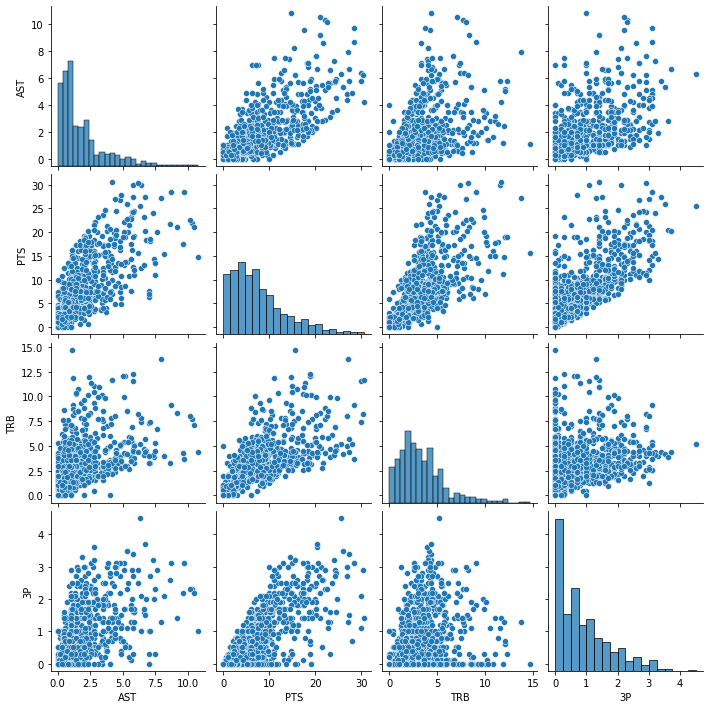

In [41]:
#grab the statistics that matter for similairty (points, assists, rebounds, 3pm)
#first we need to delete all the whitespaces because there are some in the columns
nba.columns = nba.columns.str.replace(' ', '')
#plot 
sns.pairplot(nba[["AST", "PTS", "TRB", "3P"]])
plt.show()

One big thing that you can notice with this data is that it only shows the total number of each statistic, but for example it does not take into account if they are above avg, or bad at each category. Thus, plot as a heatmap to show correlations

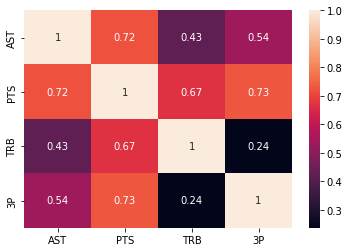

In [42]:
correlation = nba[["AST", "PTS", "TRB", "3P"]].corr()
sns.heatmap(correlation, annot=True)

Create 5 cluster of players, with labels 1 to 4

In [58]:
kmeans_model = KMeans(n_clusters=5, random_state=1)
#good columns is columns that are only values and don't have empty cells after drop
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2,

Create PCA, of player clusters where each point's color correlates with the players cluster

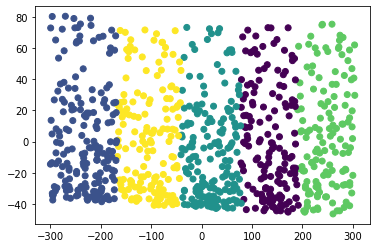

array([[ 304.0019653 ,   29.71782655],
       [ 303.6194155 ,   62.05115122],
       [ 302.24655269,   40.81861816],
       ...,
       [-298.34075606,   13.69024193],
       [-299.78814411,  -14.48089075],
       [-299.28128865,   72.95328021]])

In [59]:
pca_2 = PCA(2)

plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()
#plot columns pertains to the coordinates of each player
plot_columns

Now that we have the players all in clusters, this is the fun part where we can input any 2 players and see their averages. Then we can take that and see what cluster they are in. For this first iteration, I will be using some of the highest-output players, thus easier to identify data. Also the names from the exported CSV had their player identification so that is also part of their name column.

In [63]:
# Find player LeBron
LeBron = good_columns.loc[ nba['Player'] == 'LeBron James\jamesle01',: ]

#Find player Jokic
Jokic = good_columns.loc[ nba['Player'] == 'Nikola Jokić\jokicni01',: ]

#print the players
print("Lebron")
print(LeBron)
print("Nikola Jokic")
print(Jokic)

Lebron
      Rk  Age   G  GS    MP    FG   FGA   3P  3PA   2P  ...  FTA  ORB  DRB  \
368  274   37  56  56  37.2  11.4  21.8  2.9  8.0  8.6  ...  6.0  1.1  7.1   

     TRB  AST  STL  BLK  TOV   PF   PTS  
368  8.2  6.2  1.3  1.1  3.5  2.2  30.3  

[1 rows x 22 columns]
Nikola Jokic
      Rk  Age   G  GS    MP    FG   FGA   3P  3PA   2P  ...  FTA  ORB   DRB  \
391  290   26  74  74  33.5  10.3  17.7  1.3  3.9  9.0  ...  6.3  2.8  11.0   

      TRB  AST  STL  BLK  TOV   PF   PTS  
391  13.8  7.9  1.5  0.9  3.8  2.6  27.1  

[1 rows x 22 columns]


Now that we have the players, convert data --> list to use in Kmeans model to predict the cluster label

In [65]:
#table frame --> list
LebronList = LeBron.values.tolist()
JokicList = Jokic.values.tolist()

#Predict which group LeBron James and Nikola Jokic belongs
Lebron_Label = kmeans_model.predict(LebronList)
Jokic_Label = kmeans_model.predict(JokicList)

print(Lebron_Label)
print(Jokic_Label)
#both in cluster 2

[2]
[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Now let's do one of some Washington State Alumni that are in the NBA, I will be doing the same cluster selction for similarity with Klay Thompson (obviously) and CJ Elleby drafted in 2020 on the Portland Trailblazers.

In [71]:
# Find player Klay
Klay = good_columns.loc[ nba['Player'] == 'Klay Thompson\thompkl01',: ]

#Find player Cj Elleby
CJ = good_columns.loc[ nba['Player'] == 'CJ Elleby\ellebcj01',: ]

#print the players
print("Klay")
print(Klay)
print("Cj Elleby")
print(CJ)

Klay
Empty DataFrame
Columns: [Rk, Age, G, GS, MP, FG, FGA, 3P, 3PA, 2P, 2PA, FT, FTA, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
Index: []

[0 rows x 22 columns]
Cj Elleby
      Rk  Age   G  GS    MP   FG  FGA   3P  3PA   2P  ...  FTA  ORB  DRB  TRB  \
204  160   21  58  28  20.2  2.1  5.3  0.6  2.2  1.4  ...  1.4  1.1  2.8  3.9   

     AST  STL  BLK  TOV   PF  PTS  
204  1.5  0.6  0.3  1.0  2.0  5.8  

[1 rows x 22 columns]
